In [1]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [4]:
# Importing all necessary libraries.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# Importing sklearn and TSNE.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state we define this random state to use this value in TSNE which is a randmized algo.
RS = 20150101

# Importing matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# Importing seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [5]:
Data_1 = np.genfromtxt ('c:/Users/Imart/Desktop/text_vectors/excavator_text_vectors.csv', delimiter=",")

In [6]:
Data_1.shape

(29319, 512)

In [7]:
# Here we are importing KMeans for clustering Product Vectors
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=18, random_state=0).fit(Data_1)

In [9]:
# We can extract labels from k-cluster solution and store is to a list or a vector as per our requirement
Y=kmeans.labels_ # a vector

z = pd.DataFrame(Y.tolist()) # a list

In [13]:
MCAT_Names = pd.read_excel("c:/Users/Imart/Desktop/text_vectors/excavator_29k_data (2).xlsx",sheet_name="Sheet2")
MCAT_key = pd.read_excel("c:/Users/Imart/Desktop/text_vectors/excavator_29k_data (2).xlsx",sheet_name="PMCAT key")

MCAT_key.head()

MCAT_Names1 = pd.merge(left=MCAT_Names,right=MCAT_key,left_on=["PMCAT"],right_on=["PMCAT"],how="left")

In [14]:
MCAT_Names1.head()

MCAT                  PMCAT  key
0        Soil Bucket     Earthmoving Bucket    0
1          Excavator  Earthmoving Machinery    1
2          Excavator  Earthmoving Machinery    1
3  Crawler Excavator              Excavator    2
4    Mini Excavators              Excavator    2

In [15]:
Label_mcat = np.array(MCAT_Names1["key"])

In [16]:
PMCAT_List = list(MCAT_key["PMCAT"])
PMCAT_List

['Earthmoving Bucket',
 'Earthmoving Machinery',
 'Excavator',
 'Motor Grader',
 'Road Roller',
 'Backhoe Loader',
 'Excavator Parts',
 'End Loader',
 'Road Construction Machine',
 'Bulldozer',
 'Loose',
 'Trencher',
 'Earthmoving Machinery Parts',
 'Wheel Loaders',
 'Skid Steer Loaders']

In [17]:
len(PMCAT_List)

15

In [10]:
# Fit the model using t-SNE randomized algorithm
digits_proj = TSNE(random_state=RS).fit_transform(Data_1)


In [33]:
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 18))

    # We create a scatter plot.
    f = plt.figure(figsize=(50, 50))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(18):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=100)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


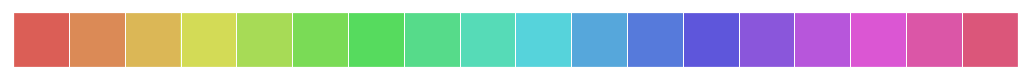

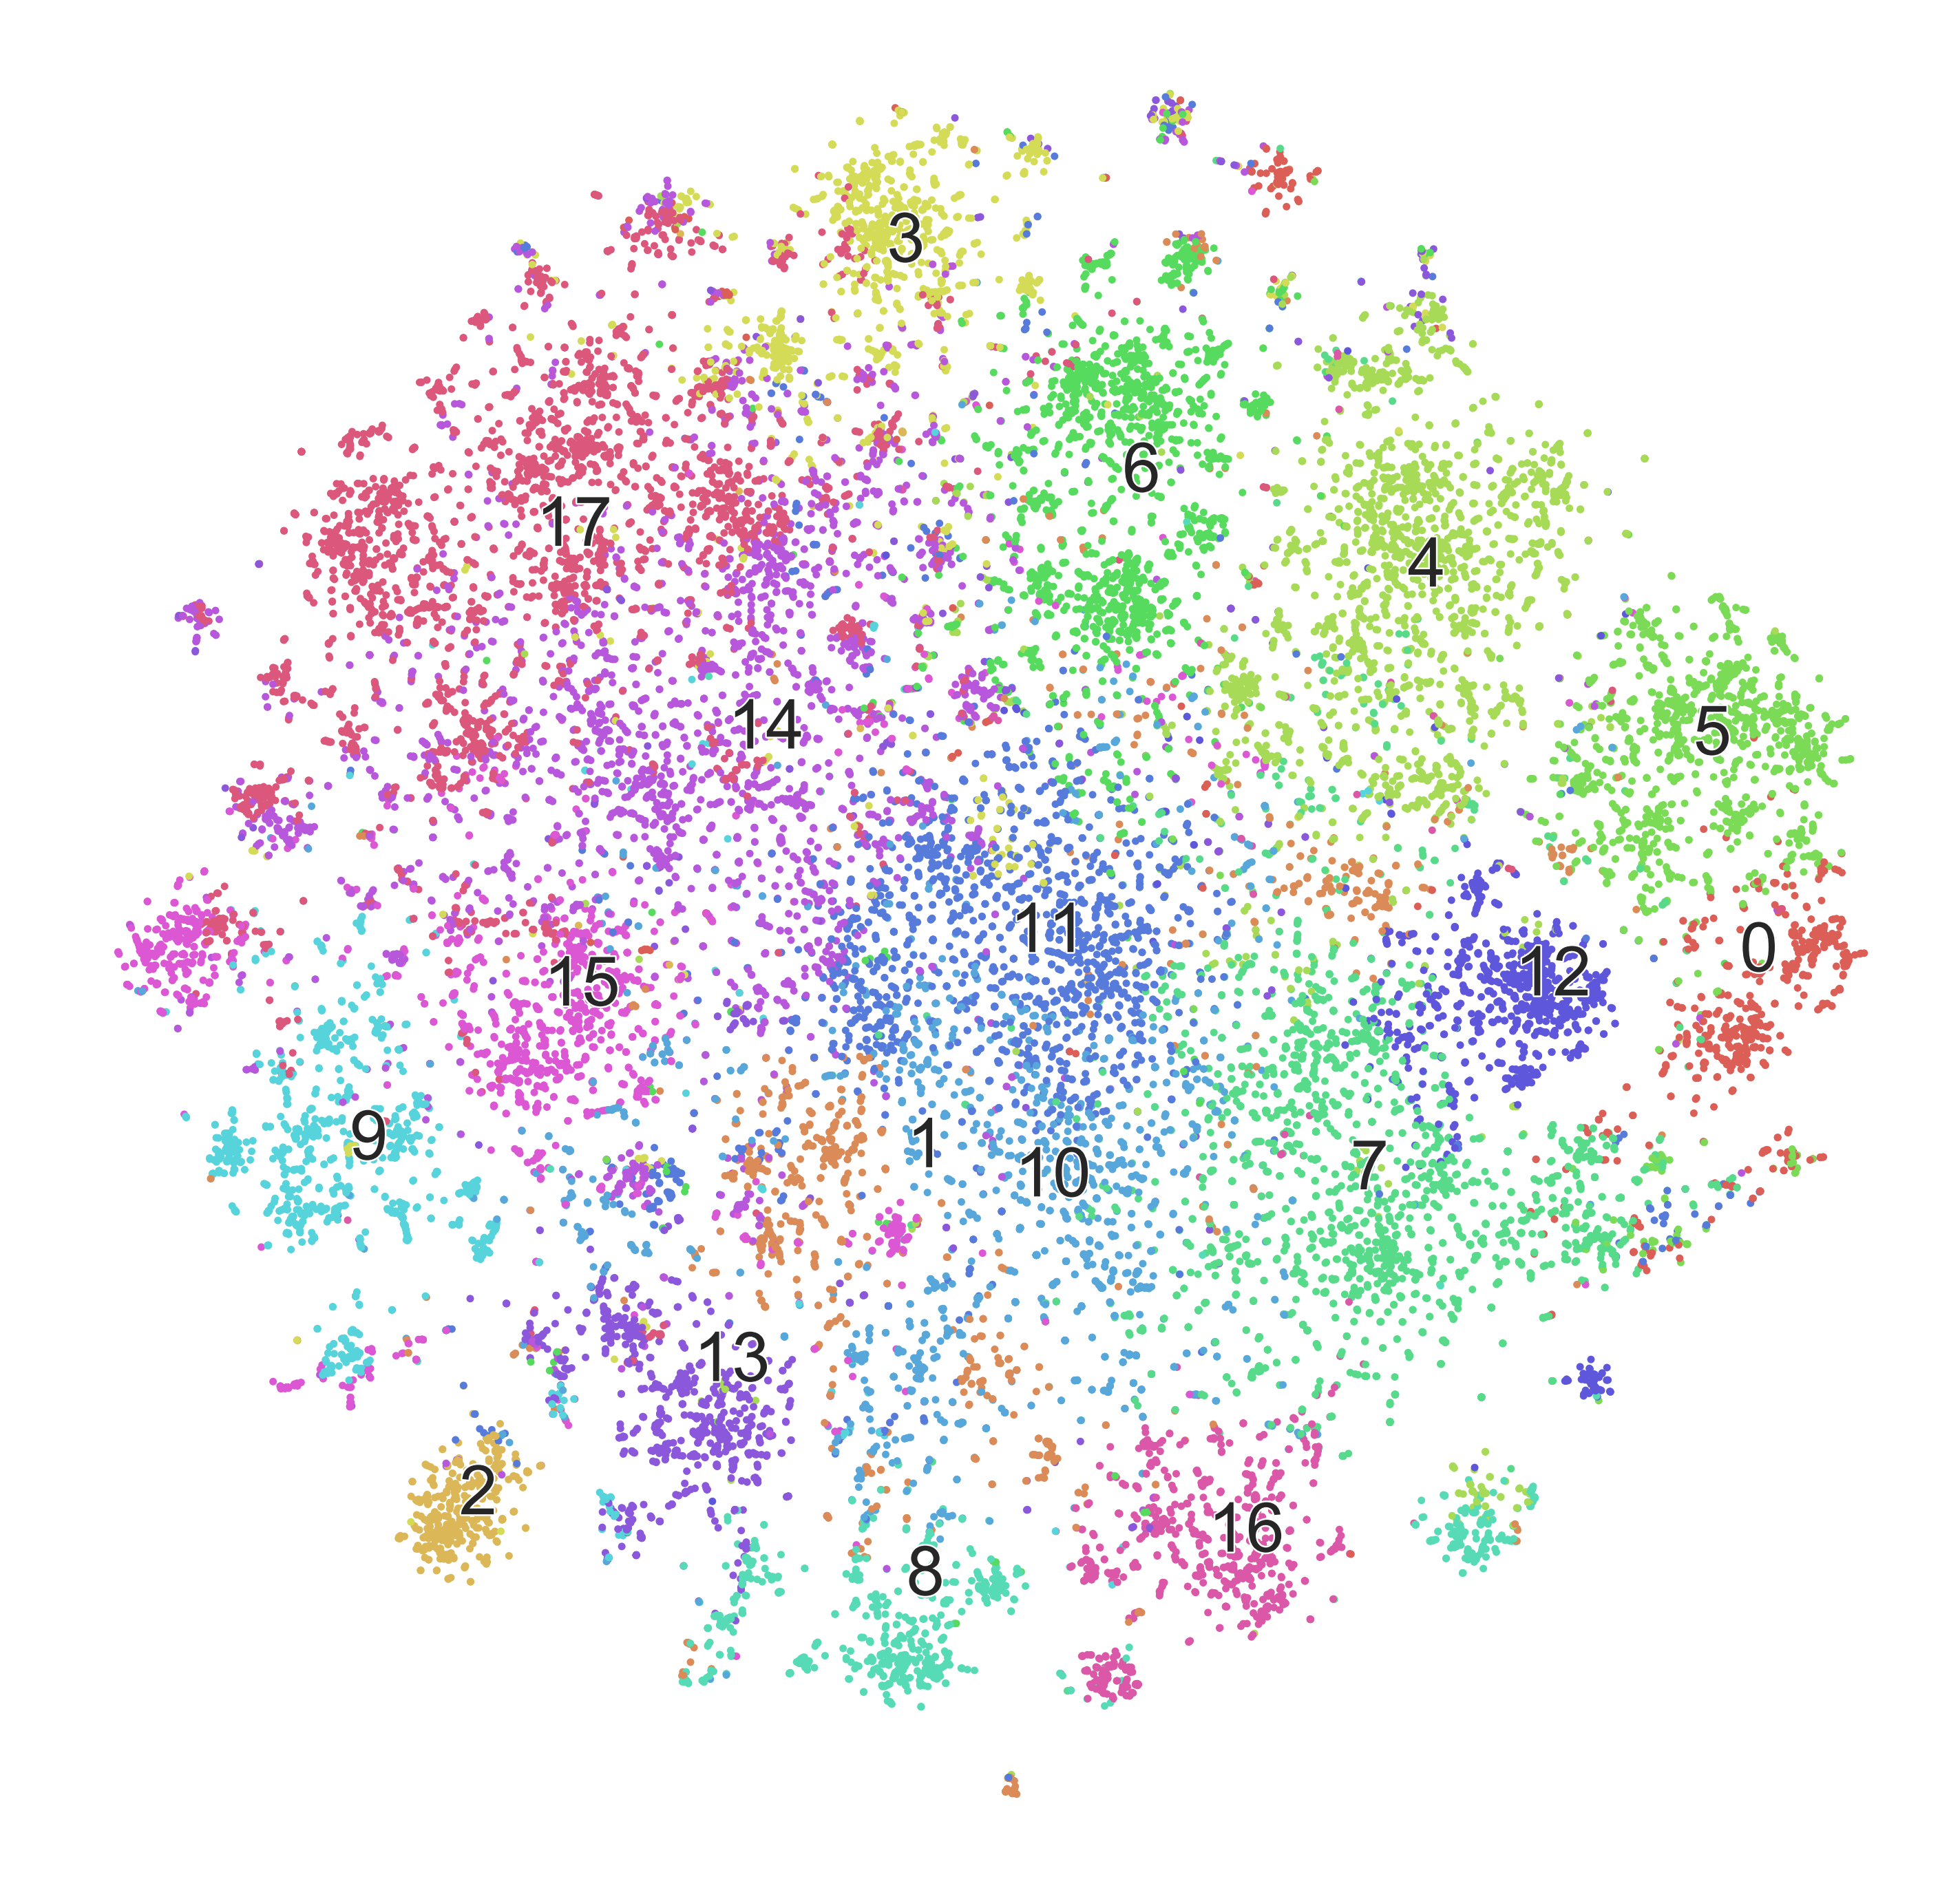

In [34]:
print(list(range(0,18)))
sns.palplot(np.array(sns.color_palette("hls", 18)))
scatter(digits_proj, Y)
plt.savefig('digits_tsne-generated_18k2_x_cluster.png', dpi=120)

In [35]:
# An user defined function to create scatter plot of vectors
def scatter_withaxis(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 18))

    # We create a scatter plot.
    f = plt.figure(figsize=(50, 50))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(18):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=100)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


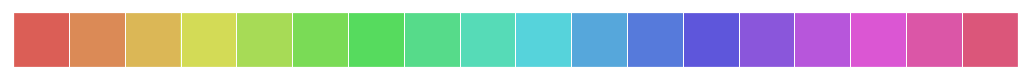

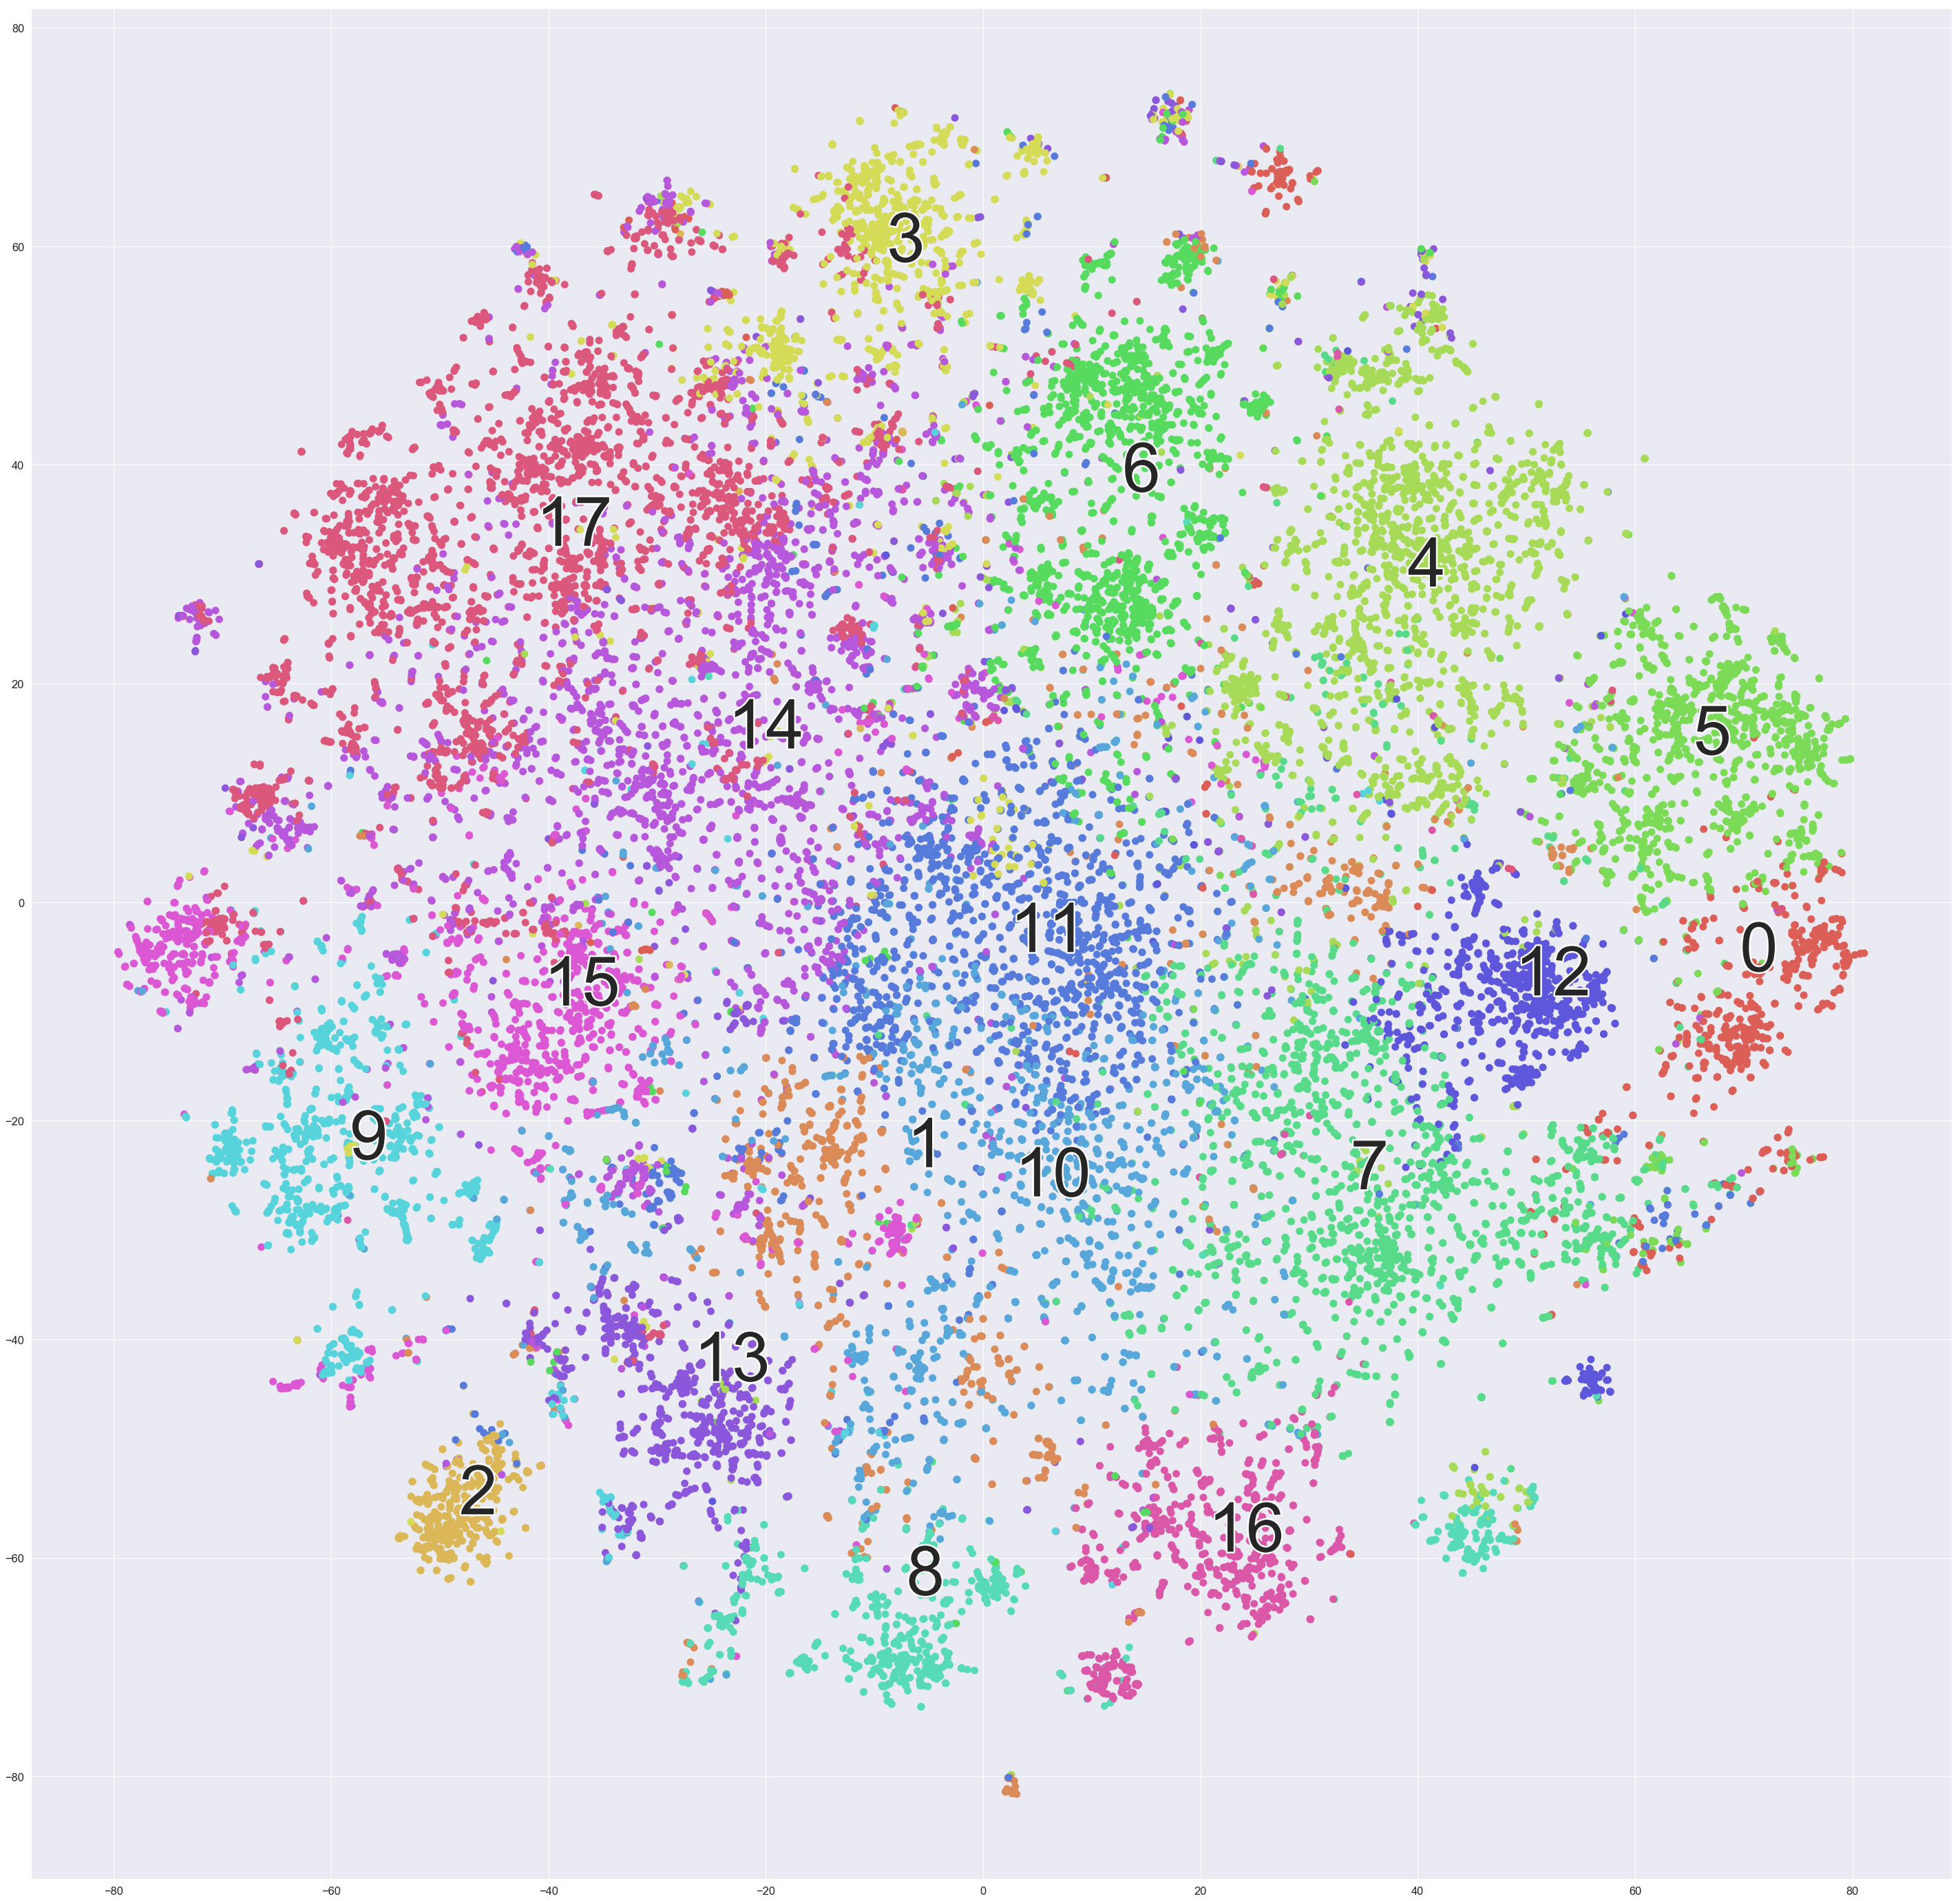

In [36]:
print(list(range(0,18)))
sns.palplot(np.array(sns.color_palette("hls", 18)))
scatter_withaxis(digits_proj, Y)
plt.savefig('digits_tsne-generated_18k2_x_cluster.png', dpi=120)

In [29]:
def scatter_2(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 15))

    # We create a scatter plot.
    f = plt.figure(figsize=(50, 50))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('on')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(15):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(PMCAT_List[i]), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

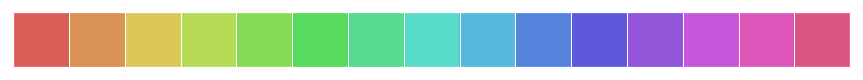

In [28]:
sns.palplot(np.array(sns.color_palette("hls", 15)))

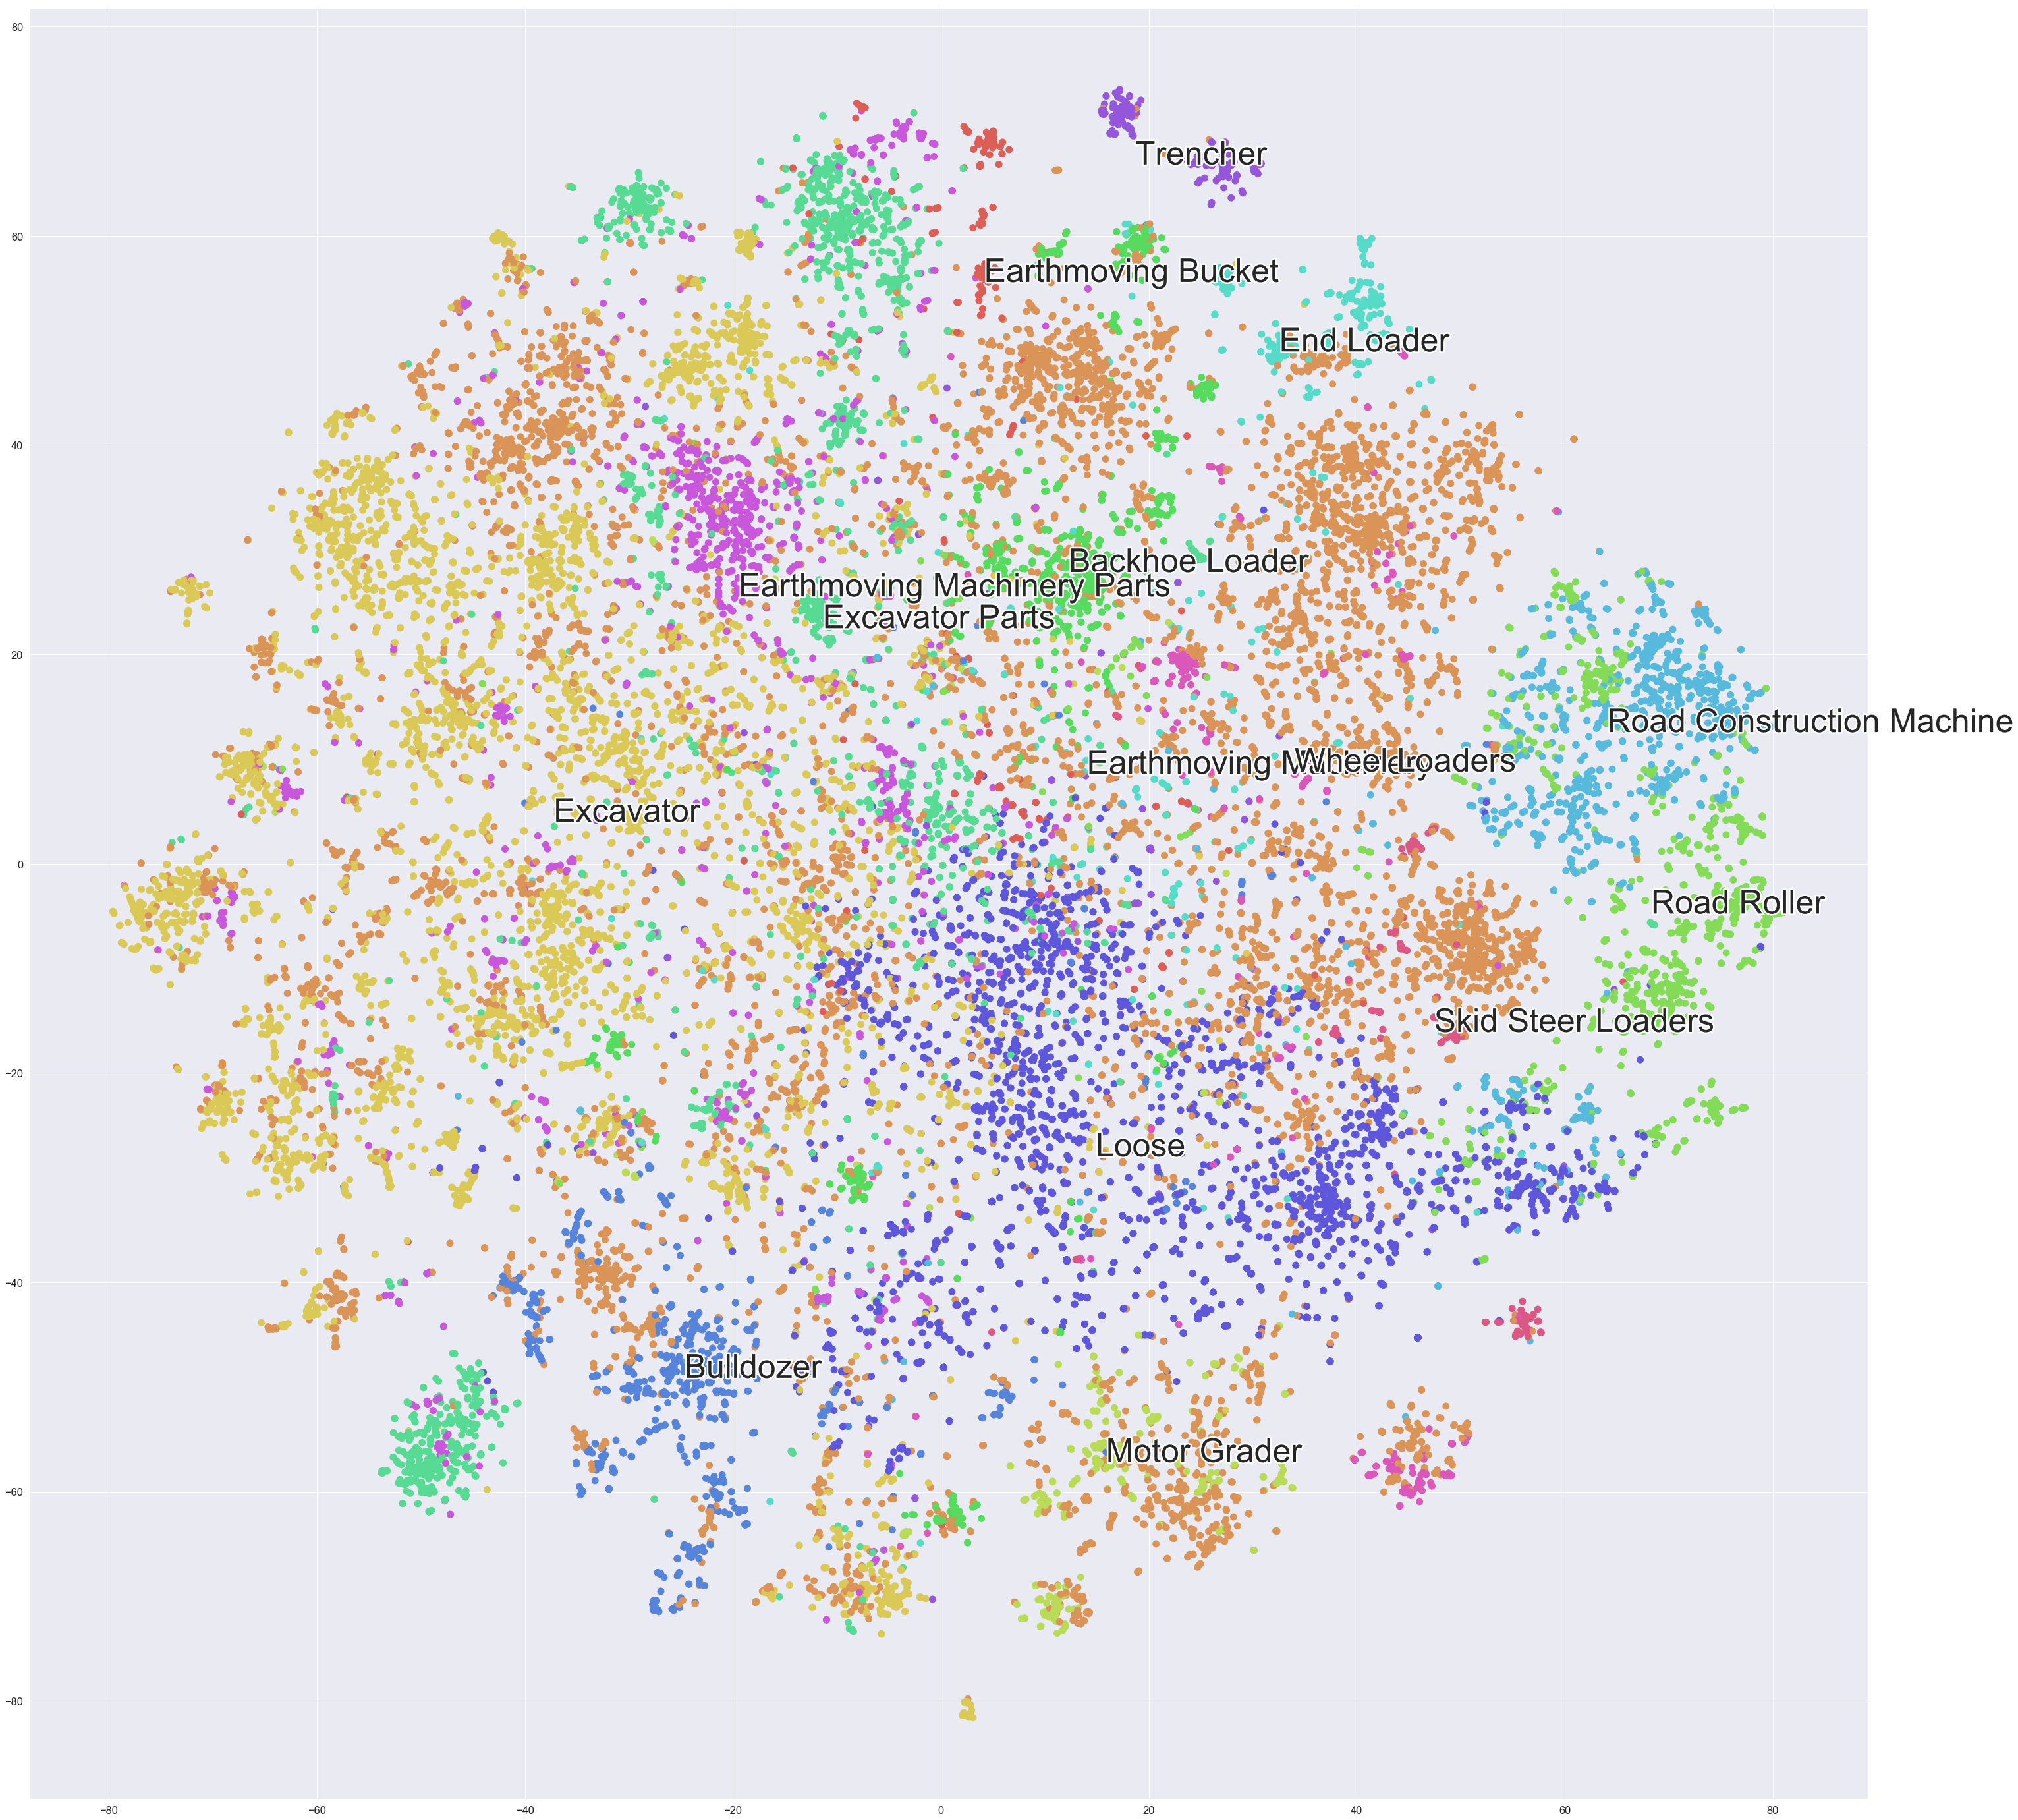

In [30]:
scatter_2(digits_proj, Label_mcat)
plt.savefig('digits_tsne-generated_pmcat15_x_plot2.png', dpi=120)